In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from matplotlib.gridspec import GridSpec
from sklearn.datasets import load_iris

In [2]:
# df_house = pd.read_csv('/Users/vladislavlipkin/Downloads/melb_data.csv') # MAC OS
df_house = pd.read_csv(r'C:\Users\Incognitus\Downloads\melb_data.csv') # WINDOWS

In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# Suburb - Пригород (район в Мельбурне)
# Address - Адрес недвижимости
# Rooms - Количество комнат
# Type - Тип недвижимости (например, дом, квартира и т.п.)
# Price - Цена продажи
# Method - Метод продажи (например, аукцион, частная продажа)
# SellerG - Название агентства-продавца
# Date - Дата продажи
# Distance - Расстояние до центра Мельбурна (в км)
# Postcode - Почтовый индекс
# Bedroom2 - Количество спален (иногда совпадает с Rooms)
# Bathroom - Количество ванных комнат
# Car - Количество парковочных мест
# Landsize - Размер участка (в м²)
# BuildingArea - Площадь здания (в м²)
# YearBuilt - Год постройки
# CouncilArea - Муниципальный округ / район
# Lattitude - Широта (геокоордината)
# Longtitude - Долгота (геокоордината)
# Regionname - Название региона (например, “Southern Metropolitan”)
# Propertycount - Количество объектов недвижимости в районе

In [5]:
# 🎯 ЗАДАНИЕ: Анализ факторов, влияющих на цену недвижимости в Мельбурне

# Цель: Определить, какие параметры недвижимости и внешней среды (например, район, расстояние до центра) наиболее сильно влияют на цену, и сделать визуализацию этих зависимостей.

# ⸻

# 📌 Этап 1. Исследование структуры данных

# Цель: Научиться “смотреть в данные”, очищать их и приводить в пригодную для анализа форму.

# ✅ Шаги:
# 	•	Загрузить данные и посмотреть первые строки (df.head()).
# 	•	Получить информацию о пропусках, типах данных (df.info(), df.isnull().sum()).
# 	•	Провести базовую чистку:
# 	•	Преобразовать дату в формат datetime.
# 	•	Удалить сильно дублирующиеся/ненужные поля, например Address.
# 	•	Обработать пропуски — подумать, что стоит заполнить, а что удалить.
# 	•	Привести числовые поля к нужному типу.

# 📊 Инструменты: pandas, базовый matplotlib.pyplot — для проверки и графиков пропущенных значений.

# ⸻

# 📌 Этап 2. Анализ базовых статистик

# Цель: Понять основные характеристики рынка недвижимости.

# ✅ Шаги:
# 	•	Посчитать среднюю цену (Price) по районам (Regionname, Suburb), по типам недвижимости (Type) и по количеству комнат.
# 	•	Построить гистограммы/boxplot:
# 	•	Распределение цены (Price) по:
# 	•	количеству комнат (Rooms)
# 	•	типу недвижимости (Type)
# 	•	расстоянию до центра (Distance)
# 	•	Найти аномальные выбросы в цене, площади, размере участка — убрать или выделить.

# 📊 Инструменты:
# 	•	pandas.groupby
# 	•	seaborn.histplot, boxplot, matplotlib.pyplot

# ⸻

# 📌 Этап 3. Исследование взаимосвязей

# Цель: Найти зависимости между признаками и ценой.

# ✅ Шаги:
# 	•	Построить корреляционную матрицу (df.corr()) — как численные переменные связаны с ценой?
# 	•	Визуализировать heatmap для корреляции.
# 	•	Построить scatterplot для Price против:
# 	•	Distance
# 	•	BuildingArea
# 	•	Landsize
# 	•	Есть ли нелинейные зависимости?

# 📊 Инструменты:
# 	•	seaborn.heatmap, scatterplot, pairplot

# ⸻

# 📌 Этап 4. Локальный анализ

# Цель: Углубиться в анализ по районам и выявить интересные сегменты.

# ✅ Шаги:
# 	•	Построить топ-10 пригородов (Suburb) с самой высокой средней ценой.
# 	•	Сравни топ-10 по цене и по расстоянию до центра — есть ли корреляция?
# 	•	Найди самые “дешёвые” пригороды, где есть дома с большим участком.

# 📊 Инструменты:
# 	•	groupby, sort_values, barplot

# ⸻

# 📌 Этап 5. Финальные инсайты и гипотезы

# Цель: Сформулировать выводы и гипотезы, как настоящий аналитик.

# ✅ Шаги:
# 	•	Какие переменные кажутся наиболее значимыми для предсказания цены?
# 	•	Какие районы могут быть интересны для покупателей/инвесторов?
# 	•	Какие рекомендации ты можешь дать риэлторам или бизнесу?

# 📢 Сделай:
# 	•	Презентационный слайд с 3–5 визуализациями и выводами.
# 	•	Финальный notebook или PDF с отчётом.

# ⸻

# 💡 Советы:
# 	•	Думай, какие переменные независимые, а какие зависимые.
# 	•	Обращай внимание на выбросы — они сильно мешают в аналитике.
# 	•	Сравнивай медиану и среднее — особенно для цены.

In [6]:
df_house.sort_values(by='Price', ascending=False).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,...,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,...,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,3122.0,...,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,...,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,9/09/2017,3.0,3206.0,...,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0


In [7]:
#  Этап 1. Исследование структуры данных

# Цель: Научиться “смотреть в данные”, очищать их и приводить в пригодную для анализа форму.

#  Шаги:
# 	•	Загрузить данные и посмотреть первые строки (df.head()).
# 	•	Получить информацию о пропусках, типах данных (df.info(), df.isnull().sum()).
# 	•	Провести базовую чистку:
# 	•	Преобразовать дату в формат datetime.
# 	•	Удалить сильно дублирующиеся/ненужные поля, например Address.
# 	•	Обработать пропуски — подумать, что стоит заполнить, а что удалить.
# 	•	Привести числовые поля к нужному типу.

#  Инструменты: pandas, базовый matplotlib.pyplot — для проверки и графиков пропущенных значений.

In [8]:
# столбец с датой преобразовать в datetime
df_house['Date'] = pd.to_datetime(df_house['Date'], format='%d/%m/%Y')

In [9]:
# найти пропущенные строки
df_house.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
# Car                62
# BuildingArea     6450
# YearBuilt        5375
# CouncilArea      1369

In [11]:
# заполнить пустые значения в столбцах
df_house.loc[:, ['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']] = \
    df_house.loc[:, ['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].fillna(0.0)

In [12]:
df_house.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,0.0,0.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [13]:
#  Этап 2. Анализ базовых статистик

# Цель: Понять основные характеристики рынка недвижимости.

#  Шаги:
#   1
# 	•	Посчитать среднюю цену (Price) по районам (Regionname, Suburb)
# 	•	Построить столбчатую диаграмму
#   2
# 	•	Распределение цены (Price) по:
# 	•	количеству комнат (Rooms)
# 	•	типу недвижимости (Type)
# 	•	расстоянию до центра (Distance)
#   3
#   •   Построить гистограммы/boxplot:
# 	•	Найти аномальные выбросы в цене, площади, размере участка — убрать или выделить.

# Инструменты:
# 	•	pandas.groupby
# 	•	seaborn.histplot, boxplot, matplotlib.pyplot

In [14]:
df_house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [15]:
# Посчитать медиана по полю (Price) сгрупированную по районам (Regionname, Suburb)

# Regionname - Название региона (например, “Southern Metropolitan”)
# Suburb - Пригород

df_avg_price_Regionname_Suburb = (
    df_house.groupby(['Regionname', 'Suburb'])['Price']
    .median()
    .reset_index()
    .rename(columns={'Price': 'avg_price_mln'})
)

df_avg_price = (
    df_house.groupby('Regionname')['Price']
    .median()
    .reset_index()
    .rename(columns={'Price': 'avg_price_mln'})
)

In [16]:
df_avg_price_Regionname_Suburb.sort_values(by='avg_price_mln', ascending=False).head(10)

# здесь мы можем увидеть что чаще всего медианная стоимость жилья выше в регионе 'Southern Metropolitan',
# и так же смотреть за стоимостью в пригородах.

,Regionname,Suburb,avg_price_mln
218,Southern Metropolitan,Kooyong,2185000.0
18,Eastern Metropolitan,Eaglemont,1901000.0
179,Southern Metropolitan,Albert Park,1900000.0
194,Southern Metropolitan,Canterbury,1890000.0
222,Southern Metropolitan,Middle Park,1880000.0
184,Southern Metropolitan,Balwyn,1850000.0
190,Southern Metropolitan,Brighton,1773500.0
217,Southern Metropolitan,Kew East,1750000.0
29,Eastern Metropolitan,Ivanhoe East,1740000.0
185,Southern Metropolitan,Balwyn North,1739000.0


In [17]:
# для читаемости поделим значения 
df_avg_price['avg_price_mln'] = df_avg_price['avg_price_mln'] / 1_000_000

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_1348\3140582668.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=45, ha='right', fontsize=10, fontweight='medium', color='#005f73')


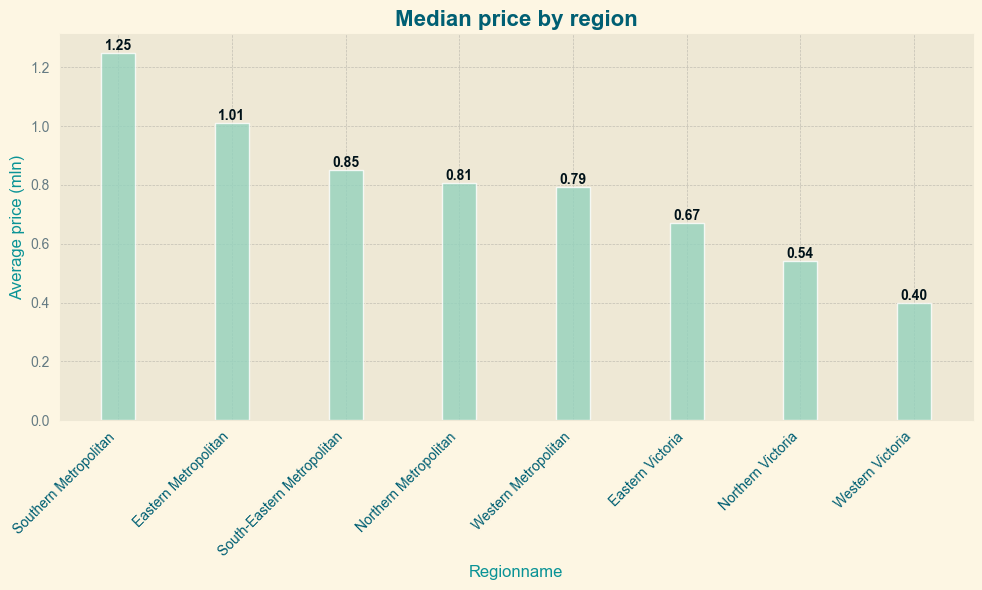

In [36]:
# Построить столбчатую диаграмму и отсортировать ее по убыванию медианной стоимости для каждого 'Regionname'

df_avg_price = df_avg_price.sort_values(by='avg_price_mln', ascending=False)

x = df_avg_price['Regionname']
y = df_avg_price['avg_price_mln']

plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y, width=0.3, color='#94d2bd', alpha=0.8)

font_title = {'fontsize': 16, 'fontweight': 'bold', 'color': '#005f73'}
font_labels = {'fontsize': 12, 'fontweight': 'medium', 'color': '#0a9396'}

ax.set_title('Median price by region', **font_title)
ax.set_xlabel('Regionname', **font_labels)
ax.set_ylabel('Average price (mln)', **font_labels)

ax.set_xticklabels(x, rotation=45, ha='right', fontsize=10, fontweight='medium', color='#005f73')

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

ax.bar_label(bars, fmt='%.2f', fontsize=10, color='#001219', fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
df_house['Price'] = df_house['Price'] / 1_000_000

In [20]:
#######   Распределение Price по Rooms  #######

In [21]:
# 1. Rooms (Количество комнат)

# Boxplot Price по Rooms:
# 	•	Показывает распределение цены внутри каждой категории комнат.
# 	•	Ты видишь:
# 	•	медиану (средняя цена)
# 	•	границы “нормальных” цен
# 	•	выбросы (очень дорогие или дешёвые квартиры)
# 	•	Помогает понять: растёт ли цена с количеством комнат?

# Пример интерпретации:

# У домов с 5 и более комнат видно, что цена сильно выше, а разброс цен тоже большой (богатые районы).

# ⸻

# Histplot Price с Rooms:
# 	•	Показывает, насколько часто встречаются те или иные цены для разных значений Rooms.
# 	•	Удобно видеть, например:
# 	•	где больше недорогих квартир (1–2 комнаты)
# 	•	где больше дорогих домов (4+ комнаты)

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_1348\1079183460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


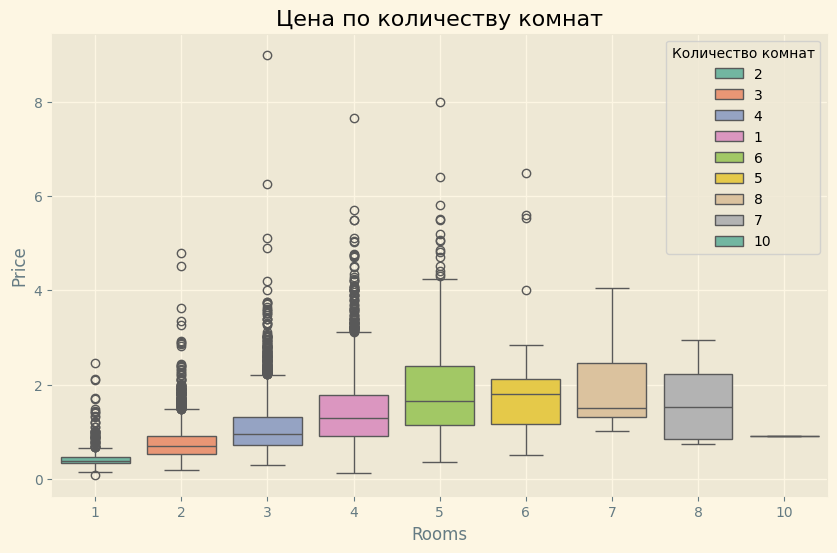

In [22]:
# BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_house, 
    x='Rooms', 
    y='Price',
    palette='Set2'
)

plt.legend(title='Количество комнат', loc='upper right', labels=df_house['Rooms'].unique())
plt.title('Цена по количеству комнат')
plt.grid(True)

plt.ticklabel_format(style='plain', axis='y')  # Отключаем научную нотацию
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# здесб мы можем видеть что самой дорогой квартирой оказалась 4 комнатная квартира
# 

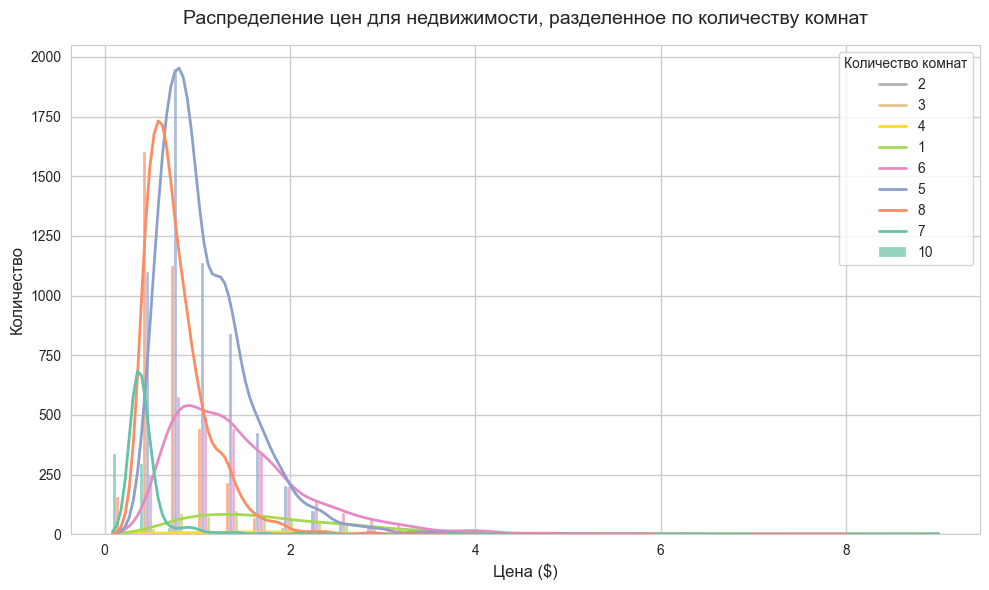

In [23]:
# HISTPLOT
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_house,
    x='Price',
    hue='Rooms',
    multiple='dodge',
    palette='Set2',
    kde=True,
    alpha=0.7,
    bins=30
)

plt.title('Распределение цен для недвижимости, разделенное по количеству комнат', fontsize=14, pad=15)
plt.xlabel('Цена ($)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend(title='Количество комнат', loc='upper right', labels=df_house['Rooms'].unique())

plt.tight_layout()

plt.show()

In [24]:
# вычисляем количество нормальных значений и выбросов по полю Rooms
def count_outliers(group):
    Q1 = group['Price'].quantile(0.25)
    Q3 = group['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    normal = group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]
    # Выбросы (за пределами усов)
    outliers = group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]
    
    return pd.Series({
        'Normal': len(normal),
        'Outliers': len(outliers)
    })
count_outliers(df_house)

Normal      12968
Outliers      612
dtype: int64

In [25]:
#######   Распределение Price по Type  #######

In [26]:
#  2. Type (Тип недвижимости)

# Boxplot Price по Type:
# 	•	Сравнивает цену для разных типов:
# 	•	h — house (дом)
# 	•	u — unit (квартира)
# 	•	t — townhouse (таунхаус)
# 	•	Ты видишь:
# 	•	У какого типа недвижимости цены выше
# 	•	Какой тип имеет больше разброса

# Пример:

# Дома (h) — дороже и имеют больше разброса в цене, чем квартиры (u).

# ⸻

# Histplot Price с Type:
# 	•	Даёт понять, как распределена цена внутри каждого типа.
# 	•	Например:
# 	•	квартиры — в основном дешёвые
# 	•	дома — во всём диапазоне от дешёвых до дорогих

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_1348\3132290651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


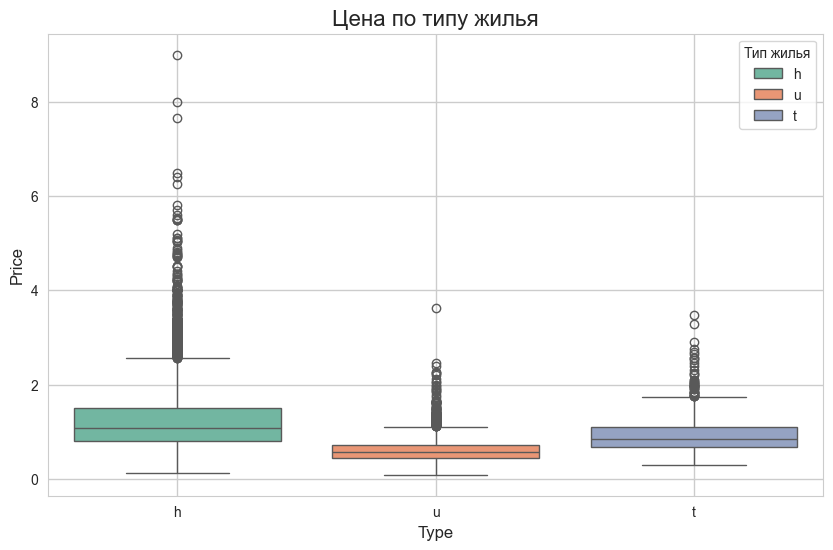

In [27]:
# BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_house, 
    x='Type', 
    y='Price',
    palette='Set2'
)

plt.legend(title='Тип жилья', loc='upper right', labels=df_house['Type'].unique())
plt.title('Цена по типу жилья')
plt.grid(True)
plt.show()

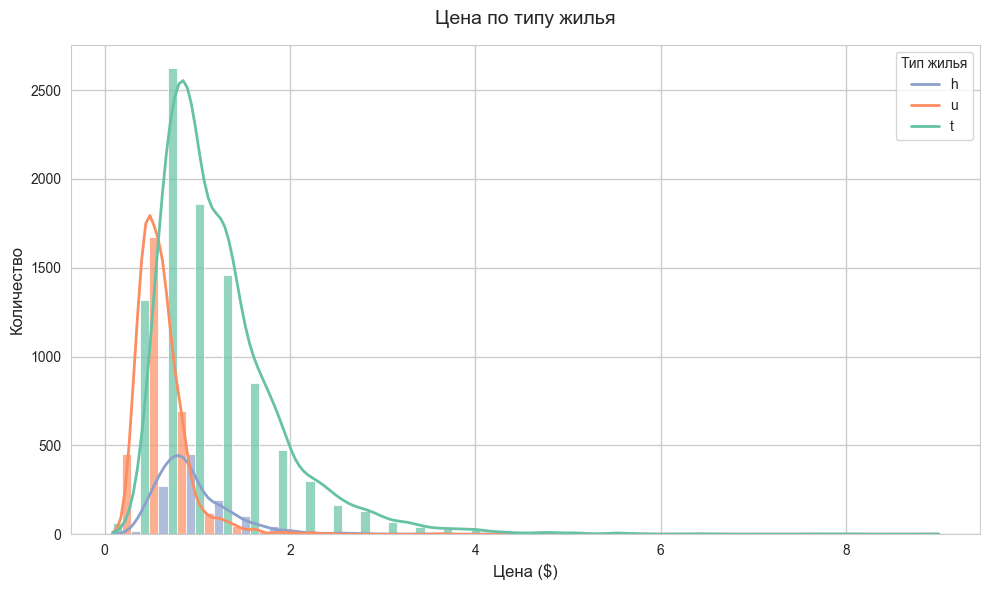

In [28]:
# HISTPLOT
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_house,
    x='Price',
    hue='Type',
    multiple='dodge',
    palette='Set2',
    kde=True,
    alpha=0.7,
    bins=30
)

plt.title('Цена по типу жилья', fontsize=14, pad=15)
plt.xlabel('Цена ($)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.legend(title='Тип жилья', loc='upper right', labels=df_house['Type'].unique())

plt.tight_layout()

plt.show()

In [29]:
# вычисляем количество нормальных значений и выбросов по полю Type
def count_outliers(group):
    Q1 = group['Price'].quantile(0.25)
    Q3 = group['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    normal = group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]
    # Выбросы (за пределами усов)
    outliers = group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]
    
    return pd.Series({
        'Normal': len(normal),
        'Outliers': len(outliers)
    })
count_outliers(df_house)

Normal      12968
Outliers      612
dtype: int64

In [30]:
#######   Распределение Price по Type  #######

In [31]:
# 3. Distance (Расстояние до центра)

# Здесь мы сначала сделали биннинг — разбили Distance на диапазоны (например: 0–5 км, 5–10 км и т.д.)

# Boxplot Price по бинам Distance:
# 	•	Помогает увидеть: чем дальше от центра — тем дешевле?
# 	•	Показывает медианные цены и выбросы для каждого диапазона

# 🔎 Пример:

# В центре (0–5 км) — самые дорогие объекты. За городом — дешевле, но есть и элитные дома-выбросы.

# ⸻

# Histplot Price с Distance_bin:
# 	•	Показывает, в каких диапазонах расстояния сконцентрированы дорогие или дешёвые дома.
# 	•	Например:
# 	•	в 10–20 км — большинство среднеценовых домов
# 	•	в 0–5 км — элита

In [32]:
df_house['Distance_bin'] = pd.cut(df_house['Distance'], bins=5)

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_1348\3058251728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


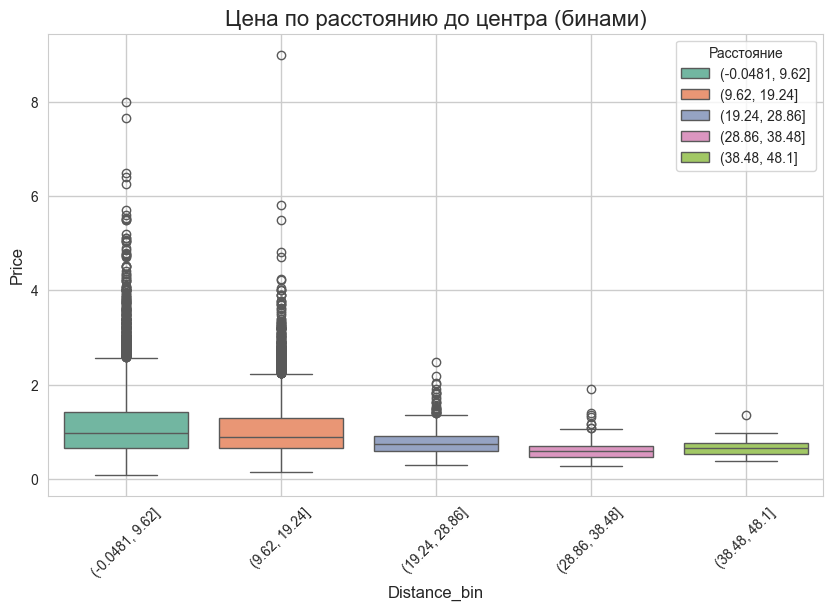

In [33]:
# BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_house, 
    x='Distance_bin', 
    y='Price',
    palette='Set2'
)

plt.legend(title='Расстояние', loc='upper right', labels=df_house['Distance_bin'].unique())
plt.title('Цена по расстоянию до центра (бинами)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

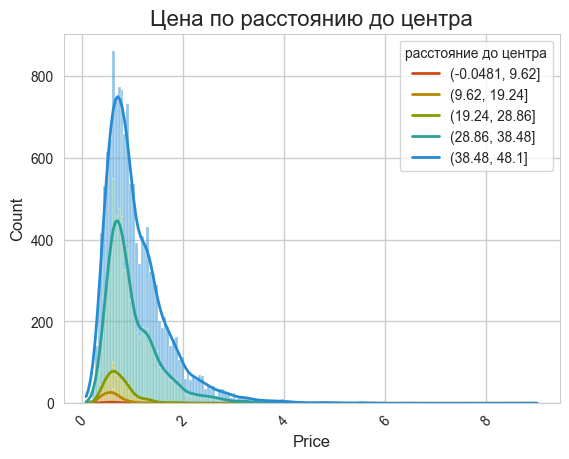

In [34]:
# HISTPLOT
sns.histplot(data=df_house, x='Price', hue='Distance_bin', kde=True, multiple='stack')
plt.legend(title='расстояние до центра', loc='upper right', labels=df_house['Distance_bin'].unique())
plt.title('Цена по расстоянию до центра')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [35]:
# слушай 
# что то все стало не понятно , но я хочу разобраться 
# давай с самого начала вот есть ТЗ 

# Цель: Понять основные характеристики рынка недвижимости.

# 	•	Построить гистограммы/boxplot:
# 	•	Распределение цены (Price) по:
# 	•	количеству комнат (Rooms)
# 	•	типу недвижимости (Type)
# 	•	расстоянию до центра (Distance)
# 	•	Найти аномальные выбросы в цене, площади, размере участка — убрать или выделить.

# 📊 Инструменты:
# 	•	pandas.groupby
# 	•	seaborn.histplot, boxplot, matplotlib.pyplot

# хочу поэтапно пройтись 
# помоги мне 
# вот поля уже обработанные ( про пропуски )
# Suburb - Пригород (район в Мельбурне)
# Address - Адрес недвижимости
# Rooms - Количество комнат
# Type - Тип недвижимости (например, дом, квартира и т.п.)
# Price - Цена продажи
# Method - Метод продажи (например, аукцион, частная продажа)
# SellerG - Название агентства-продавца
# Date - Дата продажи
# Distance - Расстояние до центра Мельбурна (в км)
# Postcode - Почтовый индекс
# Bedroom2 - Количество спален (иногда совпадает с Rooms)
# Bathroom - Количество ванных комнат
# Car - Количество парковочных мест
# Landsize - Размер участка (в м²)
# BuildingArea - Площадь здания (в м²)
# YearBuilt - Год постройки
# CouncilArea - Муниципальный округ / район
# Lattitude - Широта (геокоордината)
# Longtitude - Долгота (геокоордината)
# Regionname - Название региона (например, “Southern Metropolitan”)
# Propertycount - Количество объектов недвижимости в районе